In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
from scipy.stats import norm, skew 

In [2]:
train = pd.read_csv("train_o.csv")
test = pd.read_csv("test_o.csv")

In [3]:
display(train.head())
display(test.head())

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [111]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'source'],
      dtype='object')

In [4]:
(train.shape,test.shape)

((54808, 14), (23490, 13))

In [5]:
display(train.describe())
display(test.describe())

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


#### From above two tables we can say that both train and test data is having same distributions.

In [57]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [15]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [122]:
for col in ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']:
    print(f"Unique values in {col} : {train[col].nunique()}")

Unique values in department : 9
Unique values in region : 34
Unique values in education : 3
Unique values in gender : 2
Unique values in recruitment_channel : 3
Unique values in no_of_trainings : 10
Unique values in age : 41
Unique values in previous_year_rating : 5
Unique values in length_of_service : 35
Unique values in KPIs_met >80% : 2
Unique values in awards_won? : 2
Unique values in avg_training_score : 61


#### So, education and previous_year_rating is having large amount of missing values. Before imputing missing values first lets's analyse the data.

# Data Analysis and Visualization

### Let's explore target variable first.

Total Number of employess Promoted : 4668)
Total Number of employess Not Promoted : 50140)


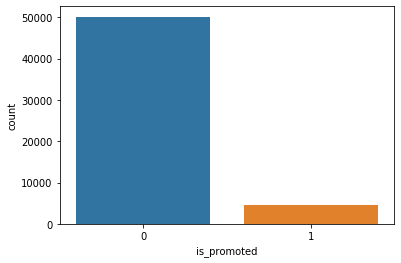

In [133]:
print(f"Total Number of employess Promoted : {len(train[train['is_promoted']==1])})")
print(f"Total Number of employess Not Promoted : {len(train[train['is_promoted']==0])})")
sns.countplot('is_promoted',data=train)

#### Hmmmm..... It's an imbalance dataset.

### HeatMap : Correlation between the features.

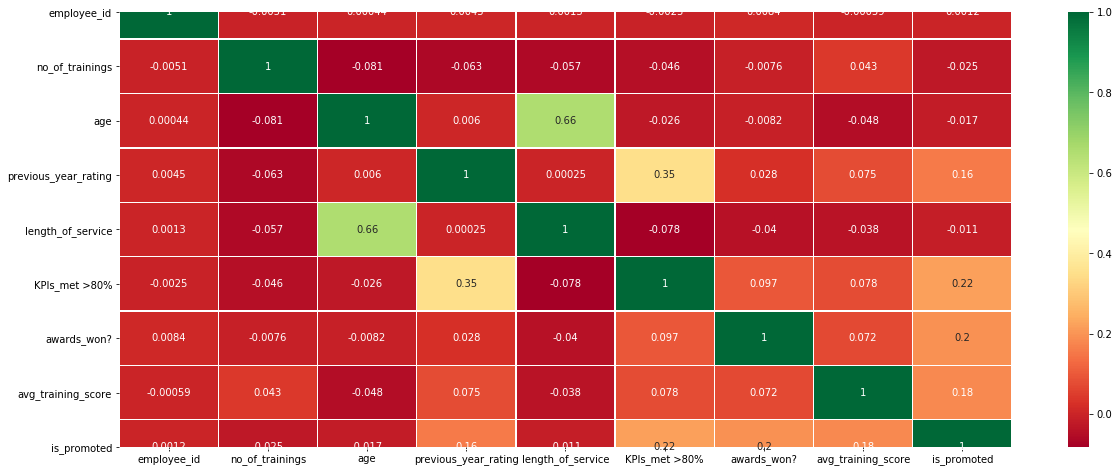

In [65]:
plt.figure(figsize=(20,8))
g = sns.heatmap(train.corr(),annot=True,cmap="RdYlGn",linewidths=0.5)

#### From the heatmap we can observe that there is certain relationship between Age and length of service and also kpi's met>80% and previous_year_rating. 

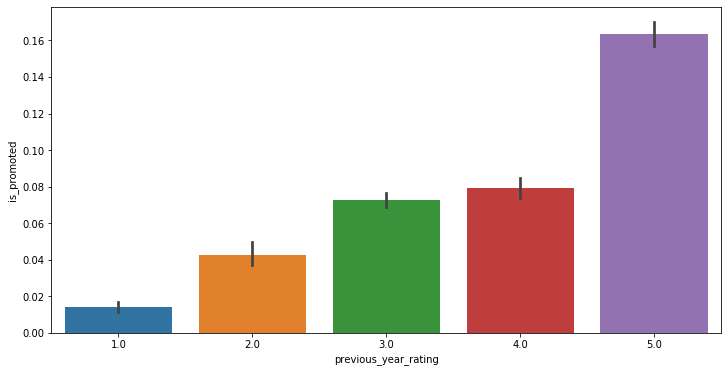

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(train['previous_year_rating'],train['is_promoted'])

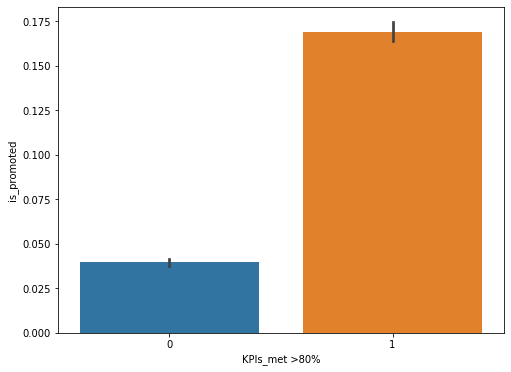

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(train['KPIs_met >80%'],train['is_promoted'])

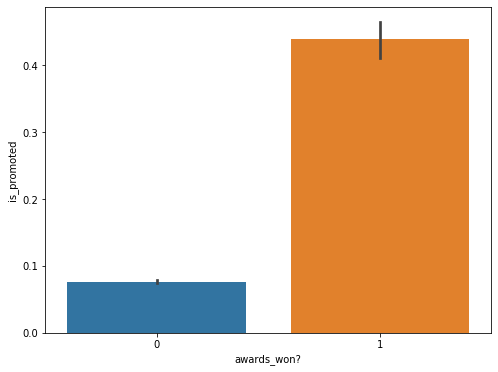

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(train['awards_won?'],train['is_promoted'])

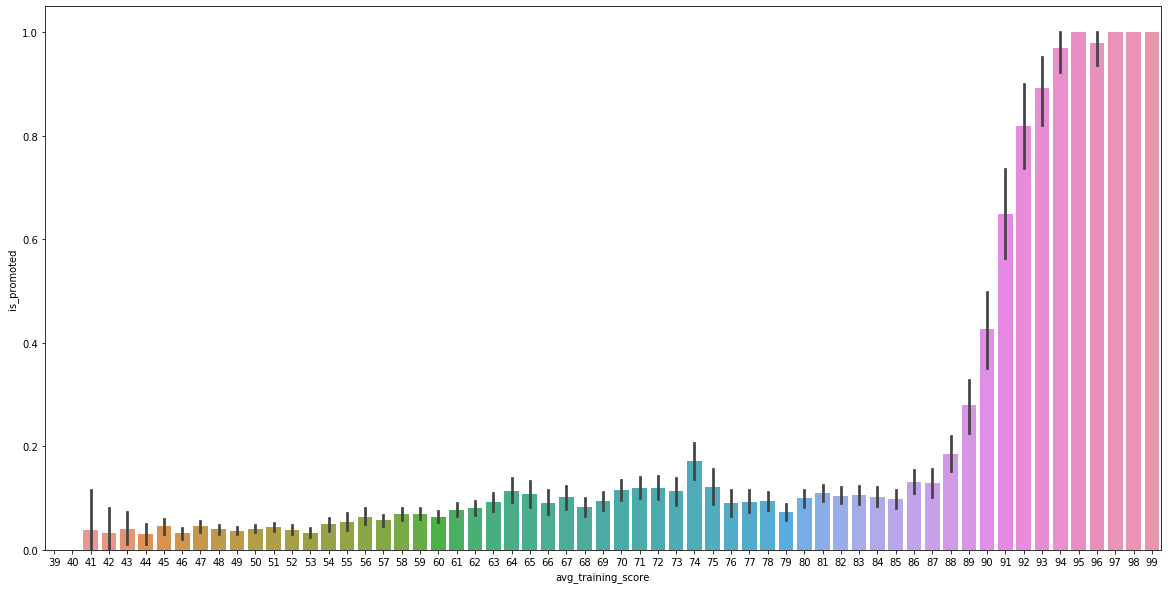

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(train['avg_training_score'],train['is_promoted'])

In [211]:
for col in tqdm(train.drop('is_promoted',axis=1).columns):
    if train[col].dtype == 'object' or train[col].nunique():
        xx = train.groupby(col)['is_promoted'].value_counts().unstack(1)
        per_not_promoted = xx.iloc[:, 0] *100/xx.apply(lambda x: x.sum(), axis=1)
        per_promoted = xx.iloc[:, 1]*100/xx.apply(lambda x: x.sum(), axis=1)
        xx['%_0'] = per_not_promoted
        xx['%_1'] = per_promoted
        display(xx)


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

is_promoted,0,1,%_0,%_1
employee_id,,,,
1,1.0,NaN,100.0,NaN
2,1.0,NaN,100.0,NaN
4,1.0,NaN,100.0,NaN
5,1.0,NaN,100.0,NaN
7,1.0,NaN,100.0,NaN
...,...,...,...,...
78292,NaN,1.0,NaN,100.0
78294,1.0,NaN,100.0,NaN
78296,1.0,NaN,100.0,NaN



  7%|█████▉                                                                             | 1/14 [00:09<01:57,  9.02s/it]

is_promoted,0,1,%_0,%_1
department,,,,
Analytics,4840,512,90.433483,9.566517
Finance,2330,206,91.876972,8.123028
HR,2282,136,94.375517,5.624483
Legal,986,53,94.898941,5.101059
Operations,10325,1023,90.985196,9.014804
Procurement,6450,688,90.361446,9.638554
R&D,930,69,93.093093,6.906907
Sales & Marketing,15627,1213,92.796912,7.203088
Technology,6370,768,89.240684,10.759316



 14%|███████████▊                                                                       | 2/14 [00:09<01:16,  6.42s/it]

is_promoted,0,1,%_0,%_1
region,,,,
region_1,552,58,90.491803,9.508197
region_10,597,51,92.129630,7.870370
region_11,1241,74,94.372624,5.627376
region_12,467,33,93.400000,6.600000
region_13,2418,230,91.314199,8.685801
region_14,765,62,92.503023,7.496977
region_15,2586,222,92.094017,7.905983
region_16,1363,102,93.037543,6.962457
region_17,687,109,86.306533,13.693467



 21%|█████████████████▊                                                                 | 3/14 [00:09<00:49,  4.54s/it]

is_promoted,0,1,%_0,%_1
education,,,,
Bachelor's,33661,3008,91.796886,8.203114
Below Secondary,738,67,91.677019,8.322981
Master's & above,13454,1471,90.144054,9.855946


is_promoted,0,1,%_0,%_1
gender,,,,
f,14845,1467,91.006621,8.993379
m,35295,3201,91.684850,8.315150



 36%|█████████████████████████████▋                                                     | 5/14 [00:09<00:28,  3.20s/it]

is_promoted,0,1,%_0,%_1
recruitment_channel,,,,
other,27890,2556,91.604809,8.395191
referred,1004,138,87.915937,12.084063
sourcing,21246,1974,91.498708,8.501292



 43%|███████████████████████████████████▌                                               | 6/14 [00:09<00:18,  2.27s/it]

is_promoted,0,1,%_0,%_1
no_of_trainings,,,,
1,40468.0,3910.0,91.189328,8.810672
2,7382.0,605.0,92.425191,7.574809
3,1654.0,122.0,93.130631,6.869369
4,442.0,26.0,94.444444,5.555556
5,125.0,3.0,97.656250,2.343750
6,42.0,2.0,95.454545,4.545455
7,12.0,NaN,100.000000,NaN
8,5.0,NaN,100.000000,NaN
9,5.0,NaN,100.000000,NaN



 50%|█████████████████████████████████████████▌                                         | 7/14 [00:09<00:11,  1.64s/it]

is_promoted,0,1,%_0,%_1
age,,,,
20,109,4,96.460177,3.539823
21,93,5,94.897959,5.102041
22,213,18,92.207792,7.792208
23,394,34,92.056075,7.943925
24,775,70,91.715976,8.284024
25,1230,69,94.688222,5.311778
26,1897,163,92.087379,7.912621
27,2566,261,90.767598,9.232402
28,2839,308,90.212901,9.787099


is_promoted,0,1,%_0,%_1
previous_year_rating,,,,
1.0,6135,88,98.585891,1.414109
2.0,4044,181,95.715976,4.284024
3.0,17263,1355,92.722097,7.277903
4.0,9093,784,92.062367,7.937633
5.0,9820,1921,83.638532,16.361468



 64%|█████████████████████████████████████████████████████▎                             | 9/14 [00:10<00:05,  1.19s/it]

is_promoted,0,1,%_0,%_1
length_of_service,,,,
1,4170.0,377.0,91.708819,8.291181
2,6089.0,595.0,91.098145,8.901855
3,6424.0,609.0,91.340822,8.659178
4,6238.0,598.0,91.252194,8.747806
5,5357.0,475.0,91.855281,8.144719
6,4333.0,401.0,91.529362,8.470638
7,5087.0,464.0,91.641146,8.358854
8,2614.0,269.0,90.669442,9.330558
9,2400.0,229.0,91.289464,8.710536


is_promoted,0,1,%_0,%_1
KPIs_met >80%,,,,
0,34111,1406,96.041332,3.958668
1,16029,3262,83.090560,16.909440



 79%|████████████████████████████████████████████████████████████████▍                 | 11/14 [00:10<00:02,  1.16it/s]

is_promoted,0,1,%_0,%_1
awards_won?,,,,
0,49429,4109,92.325078,7.674922
1,711,559,55.984252,44.015748


is_promoted,0,1,%_0,%_1
avg_training_score,,,,
39,2.0,NaN,100.000000,NaN
40,5.0,NaN,100.000000,NaN
41,25.0,1.0,96.153846,3.846154
42,60.0,2.0,96.774194,3.225806
43,169.0,7.0,96.022727,3.977273
...,...,...,...,...
95,NaN,45.0,NaN,100.000000
96,1.0,47.0,2.083333,97.916667
97,NaN,49.0,NaN,100.000000


is_promoted,0,1,%_0,%_1
source,,,,
train,50140,4668,91.482995,8.517005



100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:10<00:00,  1.33it/s]


### To calculate correlation between categorical variables we will perferom:
# Theil's U Test

In [11]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as ss

In [55]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x
def cat_corr(col):
    theilu = pd.DataFrame(index=[col],columns=cat_col)
    columns = cat_col
    for j in range(0,len(columns)):
        u = theil_u(train[col].tolist(),train[columns[j]].tolist())
        theilu.loc[:,columns[j]] = u
    theilu.fillna(value=np.nan,inplace=True)
    plt.figure(figsize=(20,1))
    sns.heatmap(theilu,annot=True,fmt='.2f')
    plt.show()

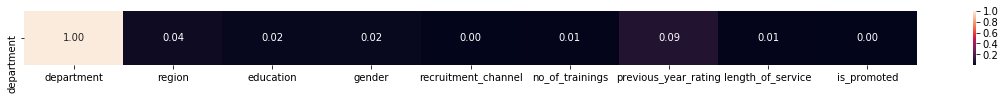

None


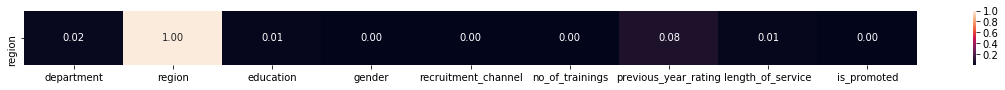

None


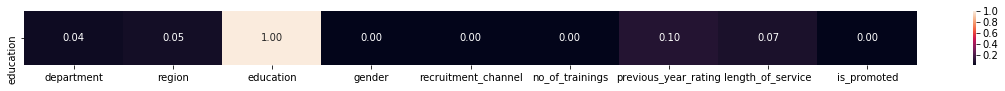

None


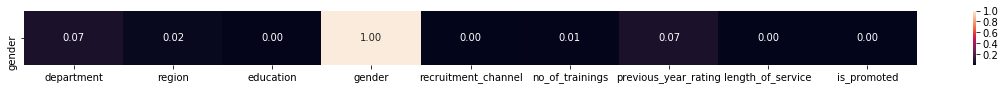

None


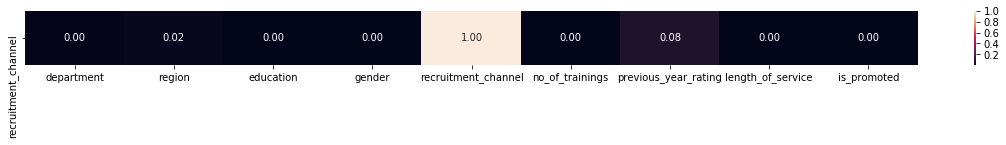

None


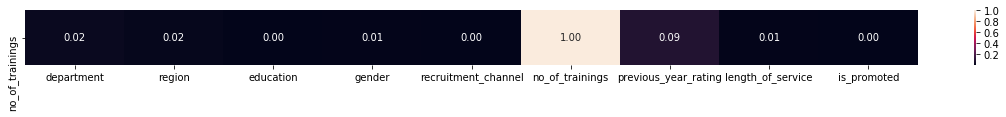

None


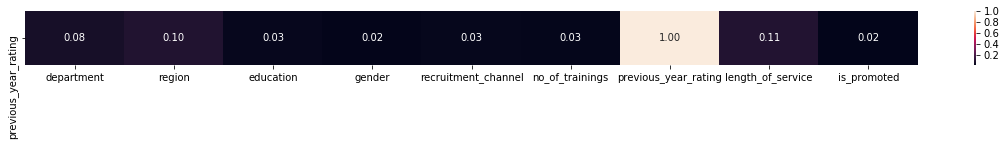

None


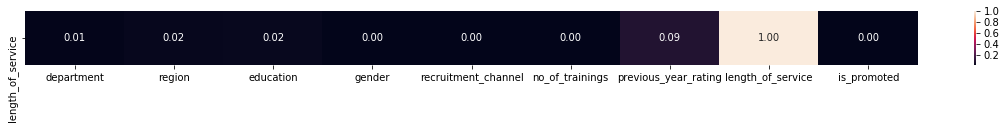

None


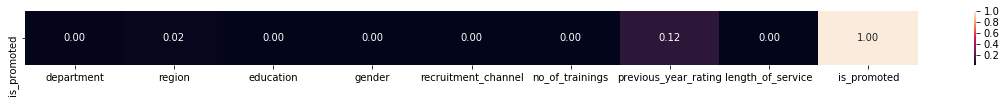

None


In [56]:
cat_col=['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'is_promoted'];
for col in ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'is_promoted']:
        print(cat_corr(col))

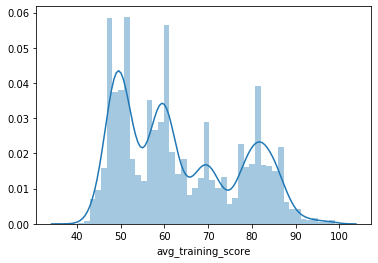

In [69]:
sns.distplot(train['avg_training_score'])

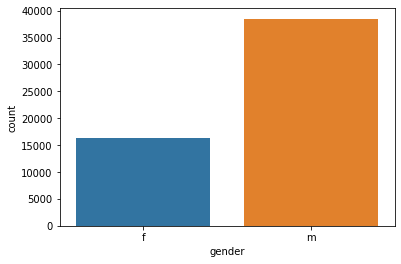

In [132]:
sns.countplot('gender',data=train)

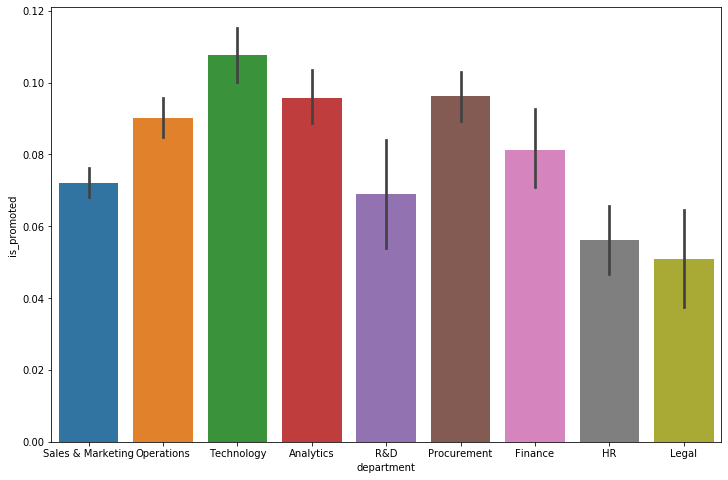

In [141]:
plt.figure(figsize=(12,8))
sns.barplot(x='department',y='is_promoted',data=train)

#### Department is having no direct correlation with the promotion. From Theil's U correlation matrix we can also derive this assumption.

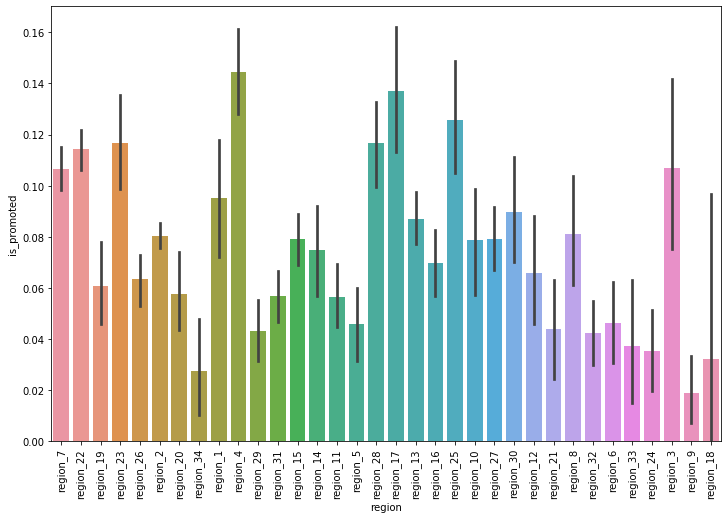

In [146]:
plt.figure(figsize=(12,8))
plt.xticks(rotation='90')
sns.barplot(x='region',y='is_promoted',data=train)

#### Region is having no direct correlation with the promotion.

### Skewness in the Features

In [165]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
awards_won?,6.338740
no_of_trainings,3.445340
is_promoted,2.972258
length_of_service,1.738014
age,1.007404
KPIs_met >80%,0.619892
avg_training_score,0.451896
employee_id,-0.003128
previous_year_rating,-0.310629


#### Amount of skewness is not very high so we will leave it as it is.

## Missing Value Imputation

#### I had tried many ways of imputation like KNN-Imputation,Mean,Median,Mode and deleting as well but replacing it with unknown variables came out the best one.

In [83]:
train['source']='train'
test['source']='test'
data=pd.concat([train,test],ignore_index=True)

C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [94]:
data['education'].fillna(value='Unknown',inplace=True)
data['education'].value_counts()

In [98]:
data['previous_year_rating'].fillna(value='0',inplace=True)
data['previous_year_rating'].value_counts()

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
0       5936
Name: previous_year_rating, dtype: int64

In [196]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['KPIs_met >80%', 'awards_won?',
       'department', 'education', 'gender',
       'recruitment_channel', 'region']
for i in var_mod:
    data3[i] = le.fit_transform(data3[i])
#One Hot Coding:
data3 = pd.get_dummies(data3, columns= ['KPIs_met >80%', 'awards_won?',
       'department', 'education', 'gender',
       'recruitment_channel', 'region'],drop_first=True)

In [194]:
data3=data.copy()

In [198]:
train1=data3[data3['source']=='train']
test1=data3[data3['source']=='test']

In [201]:
train1.drop(['age','employee_id','source'],axis=1,inplace=True)
test1.drop(['age','employee_id','source','is_promoted'],axis=1,inplace=True)

C:\Users\Abhishek\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train1.to_csv('Train1.csv')
test1.to_csv('Test1.csv')

In [208]:
from tqdm import tqdm